1. performing anlysis for the Apple stock exchange dataset from 2020-2024

In [1]:
import os, sys
current_dir = os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,parent_dir)

c:\Users\ibsan\Desktop\TenX\week-1\notebooks
c:\Users\ibsan\Desktop\TenX\week-1


In [2]:
# 2 Quantitative analysis using pynance and TaLib
import talib
import pandas as pd 
import matplotlib.pyplot as plt 
from scripts.Data_Loader import Data_Loader



In [3]:
# Paths to the data set
AAPL_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\AAPL_historical_data.csv"
AMZN_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\AMZN_historical_data.csv"
GOOG_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\GOOG_historical_data.csv"
META_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\META_historical_data.csv"
MSFT_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\MSFT_historical_data.csv"
NVDA_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\NVDA_historical_data.csv"
TSLA_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\TSLA_historical_data.csv"


In [4]:
AAPL_DF = Data_Loader(AAPL_PATH)
print(AAPL_DF.head(10))

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   
5 1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097223   48630400   
6 1980-12-22  0.132254  0.132813  0.132254  0.132254   0.101954   37363200   
7 1980-12-23  0.137835  0.138393  0.137835  0.137835   0.106257   46950400   
8 1980-12-24  0.145089  0.145647  0.145089  0.145089   0.111849   48003200   
9 1980-12-26  0.158482  0.159040  0.158482  0.158482   0.122173   55574400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.

In [5]:
# Making sure if all the necessary columns are present
print(AAPL_DF.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


Simple EDA and Data Manuplation

In [6]:
# Firts ensuring the date is in datetime format
AAPL_DF['Date'] = pd.to_datetime(AAPL_DF['Date'])

# Now filter the data for the date range between 2020-01-01 and 2024-01-01 
# for analysis simplicity

start_date = '2020-01-01'
end_date = '2024-01-01'

AAPL_DF = AAPL_DF[(AAPL_DF['Date'] >= start_date) & (AAPL_DF['Date'] <= end_date)]

# Then sorting the dataframe by Date
AAPL_DF = AAPL_DF.sort_values('Date')

# replacing date in place of index
# AAPL_DF.set_index('Date', inplace=True)

# Then displaying the head of the dataframe
print(AAPL_DF.head())

           Date       Open       High        Low      Close  Adj Close  \
9847 2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876099   
9848 2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167595   
9849 2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742661   
9850 2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400536   
9851 2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208   

         Volume  Dividends  Stock Splits  
9847  135480400        0.0           0.0  
9848  146322800        0.0           0.0  
9849  118387200        0.0           0.0  
9850  108872000        0.0           0.0  
9851  132079200        0.0           0.0  


In [7]:
print("\nSum of na in the Data-Frame")
print(AAPL_DF.isna().sum())
print("\nSum of null in the Data-Fram")
print(AAPL_DF.isnull().sum())



Sum of na in the Data-Frame
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Sum of null in the Data-Fram
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


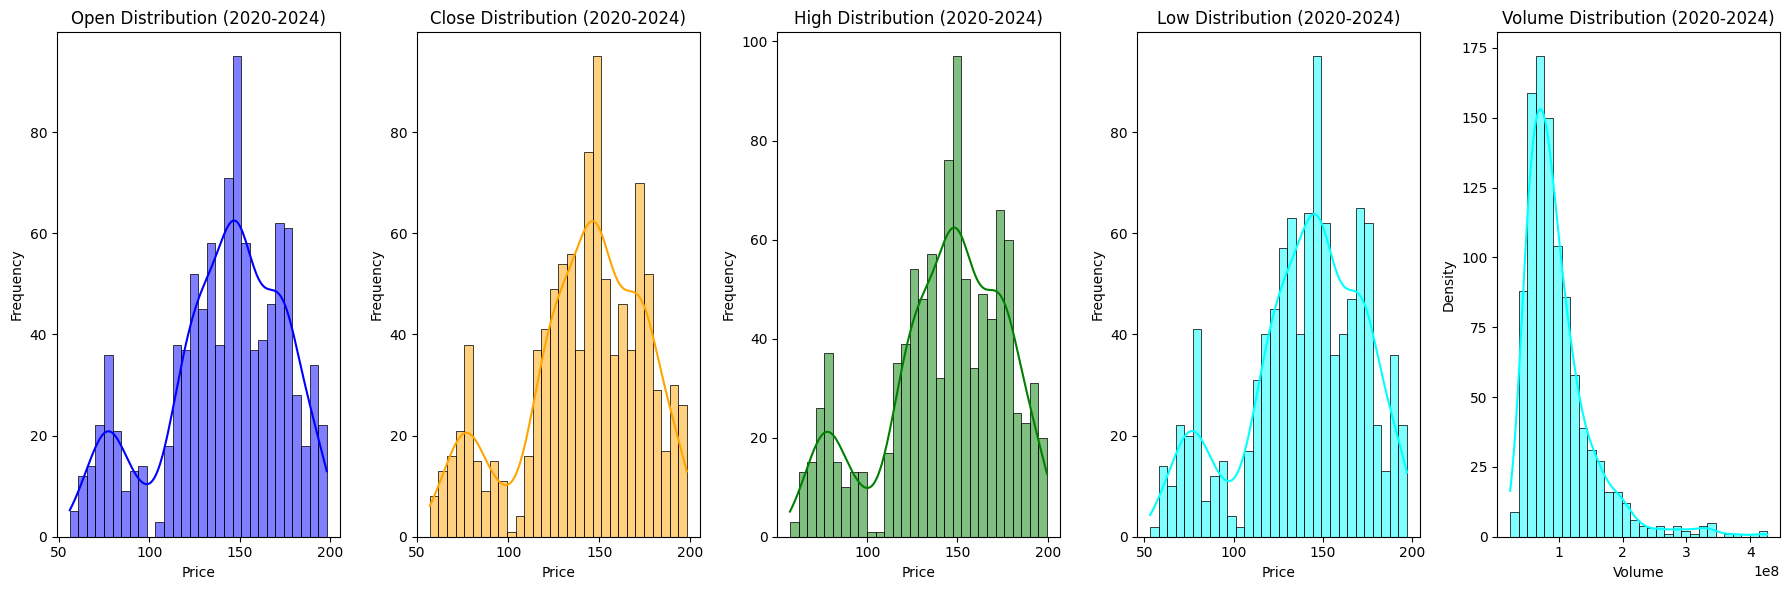

In [34]:
import seaborn as sns
columns_to_plot = ['Close', 'Open', 'High', 'Low', 'Volume']

# Create a figure with 3 subplots (1 row, 5columns)
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

# Plot the histogram for each column on different subplots
sns.histplot(AAPL_DF['Open'], ax=axes[1], color='orange', kde=True, bins=30)
axes[0].set_title('Open Distribution (2020-2024)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.histplot(AAPL_DF['Close'], ax=axes[0], color='blue', kde=True, bins=30)
axes[1].set_title('Close Distribution (2020-2024)')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

sns.histplot(AAPL_DF['High'], ax=axes[2], color='green', kde=True, bins=30)
axes[2].set_title('High Distribution (2020-2024)')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frequency')

sns.histplot(AAPL_DF['Low'], ax=axes[3], color='cyan', kde=True, bins=30)
axes[3].set_title('Low Distribution (2020-2024)')
axes[3].set_xlabel('Price')
axes[3].set_ylabel('Frequency')

sns.histplot(AAPL_DF['Volume'], ax=axes[4], color='cyan', kde=True, bins=30)
axes[4].set_title('Volume Distribution (2020-2024)')
axes[4].set_xlabel('Volume')
axes[4].set_ylabel('Density')

plt.tight_layout()
plt.show()

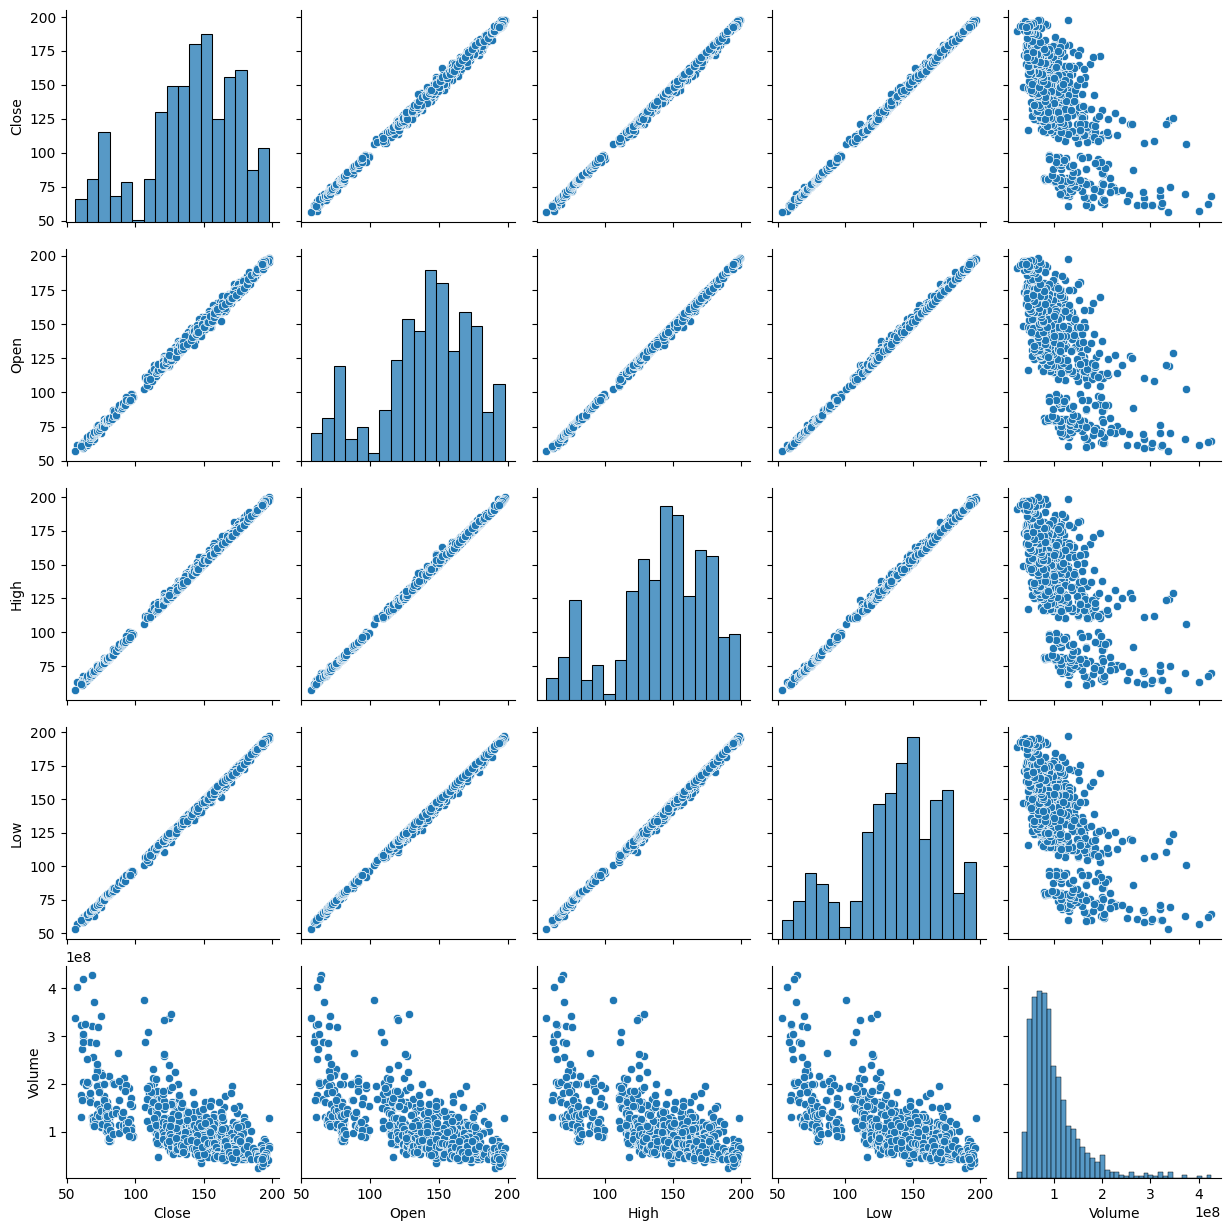

In [32]:
# Using a pair plot
columns_to_plot = ['Close', 'Open', 'High', 'Low', 'Volume']

# Create a pairplot for the selected columns
sns.pairplot(AAPL_DF[columns_to_plot])
plt.show()

1.1 Time Series Analysis

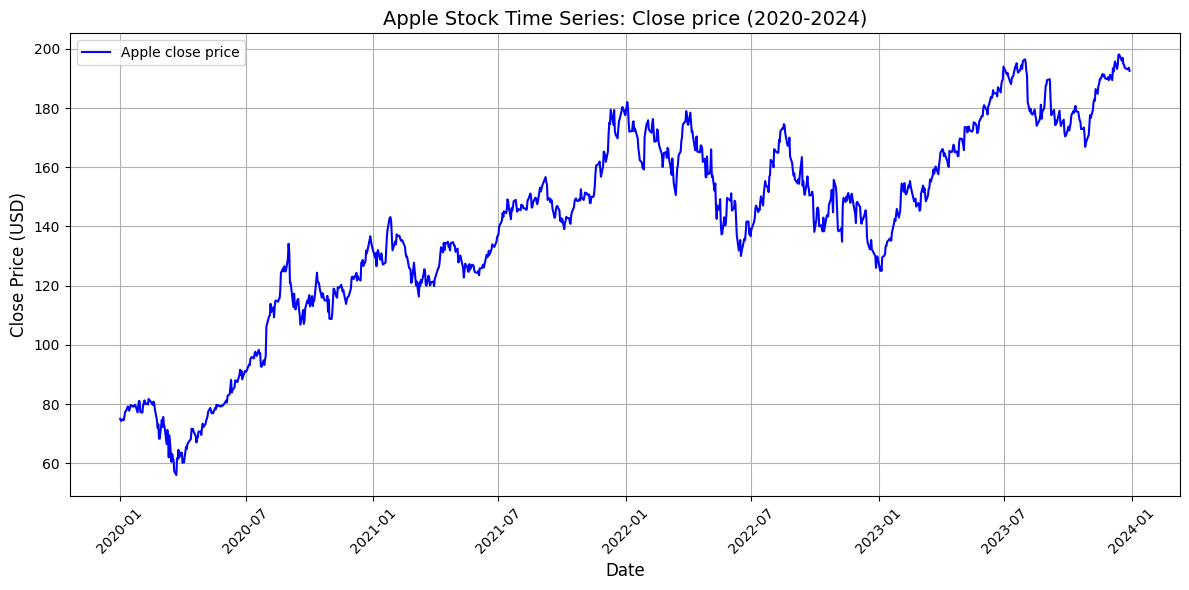

In [9]:
# Plotting the time-series plot for the closing price of the Apple stock dataset

plt.figure(figsize=(12,6))
plt.plot(AAPL_DF['Date'] , AAPL_DF['Close'], label='Apple close price', color='blue')
plt.title('Apple Stock Time Series: Close price (2020-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

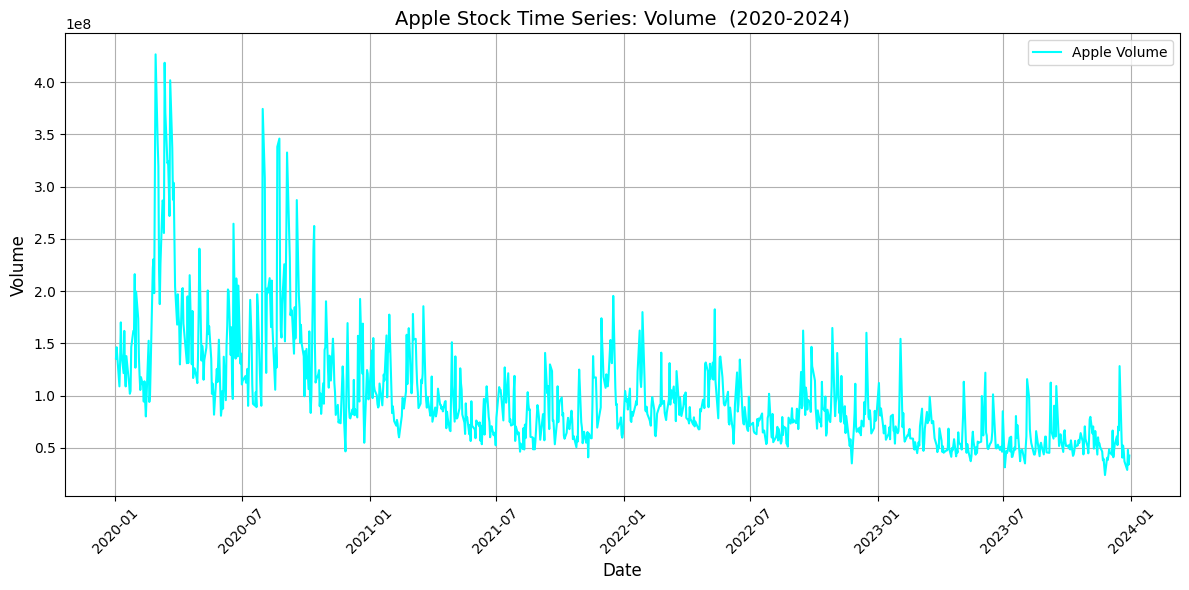

In [18]:
# Plotting the time-series plot for the Volume of the Apple stock dataset

plt.figure(figsize=(12,6))
plt.plot(AAPL_DF['Date'] , AAPL_DF['Volume'], label='Apple Volume', color='cyan')
plt.title('Apple Stock Time Series: Volume  (2020-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# Then Calculating the Moving Average, relative strength index and 
# Calculating Moving Average Convergence Divergence for the AAPL_DF dataset
import talib

# Calculating simple moving average 
sma = talib.SMA(AAPL_DF['Close'], timeperiod=5)
# then merging into the data frame
AAPL_DF['SMA'] = sma

# Calculating relative strength index 
rsi = talib.RSI(AAPL_DF['Close'], timeperiod=14)
AAPL_DF['RSI'] = rsi

# Calculating Moving Average Convergence Divergence

macd, macdsignal, macdhist = talib.MACD(AAPL_DF['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
AAPL_DF['MACD'] = macd
AAPL_DF['MACD_Signal'] = macdsignal
AAPL_DF['MACD_Histogram'] = macdhist

print(AAPL_DF.head(10))

           Date       Open       High        Low      Close  Adj Close  \
9847 2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876099   
9848 2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167595   
9849 2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742661   
9850 2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400536   
9851 2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208   
9852 2020-01-09  76.809998  77.607498  76.550003  77.407501  75.127769   
9853 2020-01-10  77.650002  78.167503  77.062500  77.582497  75.297638   
9854 2020-01-13  77.910004  79.267502  77.787498  79.239998  76.906311   
9855 2020-01-14  79.175003  79.392502  78.042503  78.169998  75.867821   
9856 2020-01-15  77.962502  78.875000  77.387497  77.834999  75.542694   

         Volume  Dividends  Stock Splits        SMA  RSI  MACD  MACD_Signal  \
9847  135480400        0.0           0.0        NaN  NaN   NaN          NaN   
9848  146322800        0.0 